In [93]:
%matplotlib inline

import os 
import librosa
import librosa.display
import importlib
import matplotlib
import numpy as np
import string as strp
import pr_util as util
import matplotlib.pyplot as plt
import generate_global_features_2 as ggf

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm, neighbors
from sklearn.naive_bayes import GaussianNB

from extract_syllable_duration_4 import autodetec 

importlib.reload(util)
importlib.reload(ggf)

<module 'generate_global_features_2' from '/Users/felipefelix/USP/tcc/code/generate_global_features_2.py'>

In [48]:
PICS_DIR = '/Users/felipefelix/USP/tcc/pics/'

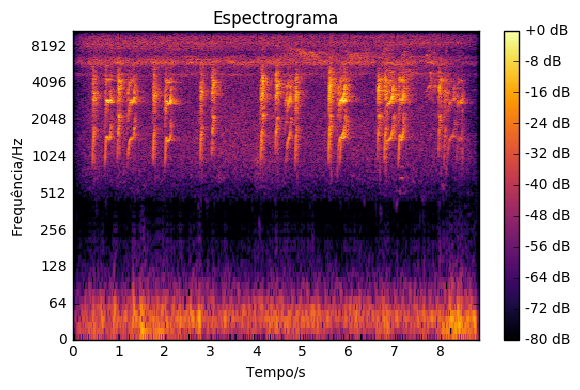

In [66]:
y, sr = librosa.load('../dataset/pr_article/S_A_C_Base_Parte-1/Automolus leucophthalmus/song/100066.mp3') 
D = librosa.stft(y)

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time', cmap = 'inferno')
plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
plt.colorbar(format='%+2.0f dB')
plot1 = plt.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_espectro.pdf')
pp.savefig(plot1)
pp.close()

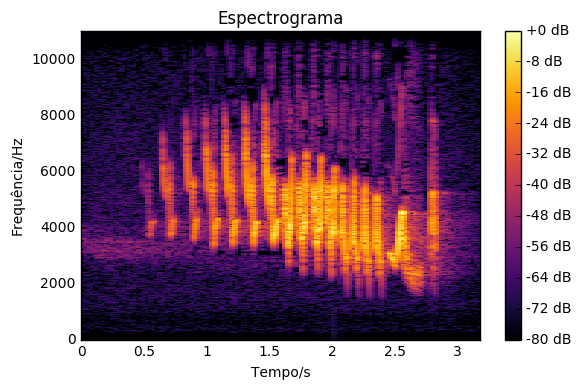

In [65]:
y, sr = librosa.load('../dataset/monografia/exemploFringilla coelebs.mp3')

D = librosa.stft(y[20000:90000])

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
plt.colorbar(format='%+2.0f dB')
plot1 = plt.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_espectro_hierarquia.pdf')
pp.savefig(plot1)
pp.close()

In [92]:
y1, sr1 = librosa.load('../dataset/monografia/XC112925 - Ochraceous Wren - Troglodytes ochraceus.mp3')
y2, sr2 = librosa.load('../dataset/monografia/XC223128 - Narrow-billed Antwren - Formicivora iheringi.mp3')
y3, sr3 = librosa.load('../dataset/monografia/XC261074 - Whiskered Wren - Pheugopedius mystacalis mystacalis.mp3')
y4, sr4 = librosa.load('../dataset/monografia/Call_Brotogeris_tirica_PNT_180605.mp3')
y5, sr5 = librosa.load('../dataset/monografia/Call_Cichlocolaptes leucophrus.mp3')
y6, sr6 = librosa.load('../dataset/monografia/Call_Myiophobus%20fasciatus.mp3')


D1 = librosa.stft(y1[:int(len(y1)/3)])
D2 = librosa.stft(y2[2000:int(len(y2)/8)])
D3 = librosa.stft(y3[40000:int(len(y3)/2)])
D4 = librosa.stft(y4[:int(len(y4)/1)])
D5 = librosa.stft(y5[:int(len(y5)/1)])
D6 = librosa.stft(y6[:int(len(y6)/1)])

fig = plt.figure(figsize=(10,9))

ax = fig.add_subplot(321)
librosa.display.specshow(librosa.amplitude_to_db(D1, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
#plt.colorbar(format='%+2.0f dB')


ax2 = fig.add_subplot(323)
librosa.display.specshow(librosa.amplitude_to_db(D2, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
#plt.colorbar(format='%+2.0f dB')

ax3 = fig.add_subplot(325)
librosa.display.specshow(librosa.amplitude_to_db(D3, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')

#plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
#plt.colorbar(format='%+2.0f dB')


ax4 = fig.add_subplot(322)
librosa.display.specshow(librosa.amplitude_to_db(D4, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
#plt.colorbar(format='%+2.0f dB')


ax5 = fig.add_subplot(324)
librosa.display.specshow(librosa.amplitude_to_db(D5, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
#plt.colorbar(format='%+2.0f dB')

ax6 = fig.add_subplot(326)
librosa.display.specshow(librosa.amplitude_to_db(D6, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')

#plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
#plt.colorbar(format='%+2.0f dB')


plot = fig.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_espectros_cantos_chamadas.pdf')
pp.savefig(plot)
pp.close()

In [104]:
y, sr = librosa.load('/Users/felipefelix/USP/tcc/dataset/pr_article/experimentos_100/Trogon surrucura/song/10098-2.wav.filtered1.wav')
D = librosa.stft(y)


In [98]:
y_new = autodetec(y, 2, 0.2, 'signal')

<- autodetec
-> autodetec


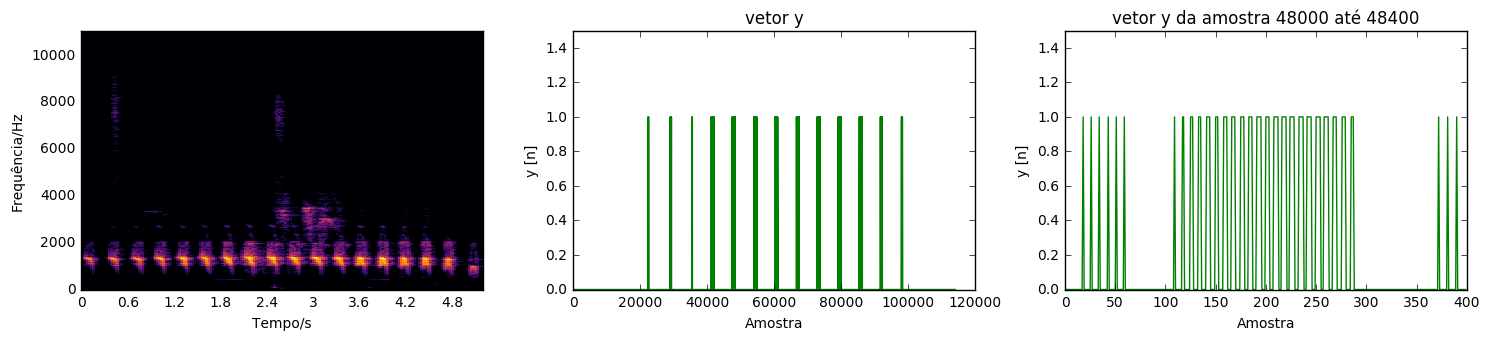

In [106]:

# zoom
# plt.plot(y_new[48000:48400], 'g')
fig = plt.figure(figsize=(15,3.5))
ax = fig.add_subplot(131)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')

ax = fig.add_subplot(132)
plt.ylim([0,1.5])
plt.plot(y_new, 'g')
plt.title('vetor y')
plt.xlabel('Amostra')
plt.ylabel('y [n]')

ax = fig.add_subplot(133)
plt.ylim([0,1.5])
plt.plot(y_new[48000:48400], 'g')
plt.title('vetor y da amostra 48000 até 48400')
plt.xlabel('Amostra')
plt.ylabel('y [n]')

plot = fig.tight_layout()

pp = PdfPages(PICS_DIR + 'vetor_y_com_y_zoom.pdf')
pp.savefig(plot)
pp.close()

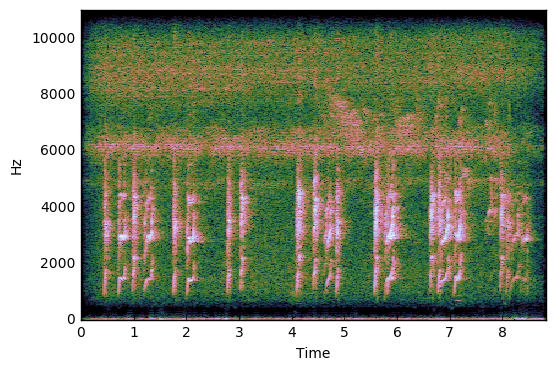

In [19]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'cubehelix')


In [21]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'jet')


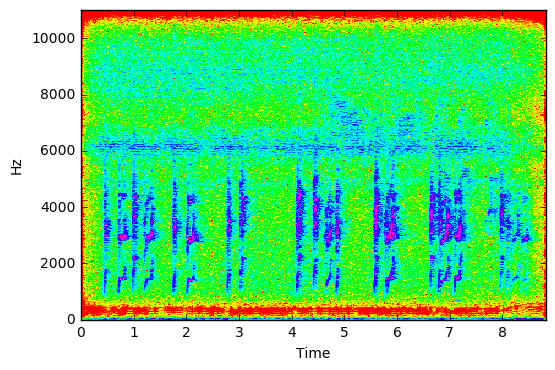

In [23]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'hsv')


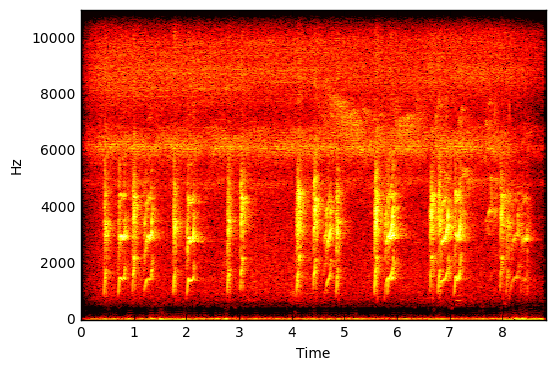

In [25]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'hot')


In [28]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'copper')


In [30]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'viridis')


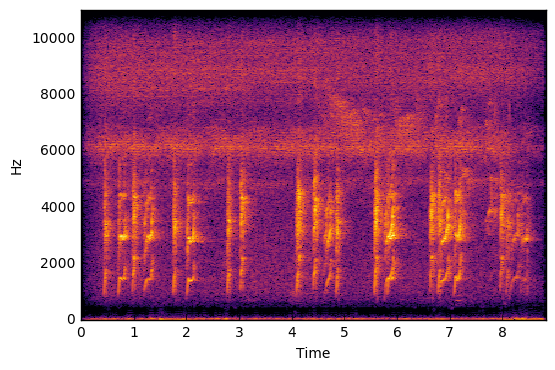

In [35]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
